In [ ]:
import torch
from torch import nn

import torchvision
import torchvision.transforms as transforms
torch.__version__

'2.2.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train = True,
                                       download = True, transform = transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download = True, transform= transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(trainset.data), len(trainset.targets), len(testset.data), len(testset.targets)

(50000, 50000, 10000, 10000)

In [ ]:
class_names = trainset.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Image shape: torch.Size([3, 32, 32])


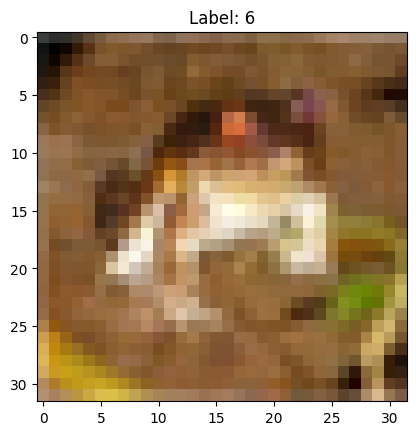

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get an image and its label from the dataset
image, label = trainset[0]
print(f"Image shape: {image.shape}")

# Convert from PyTorch tensor (C, H, W) to NumPy array (H, W, C)
image = image.numpy().transpose((1, 2, 0))

# Unnormalize the image
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
image = std * image + mean
image = np.clip(image, 0, 1)  # Ensure the image values are between 0 and 1

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.show()

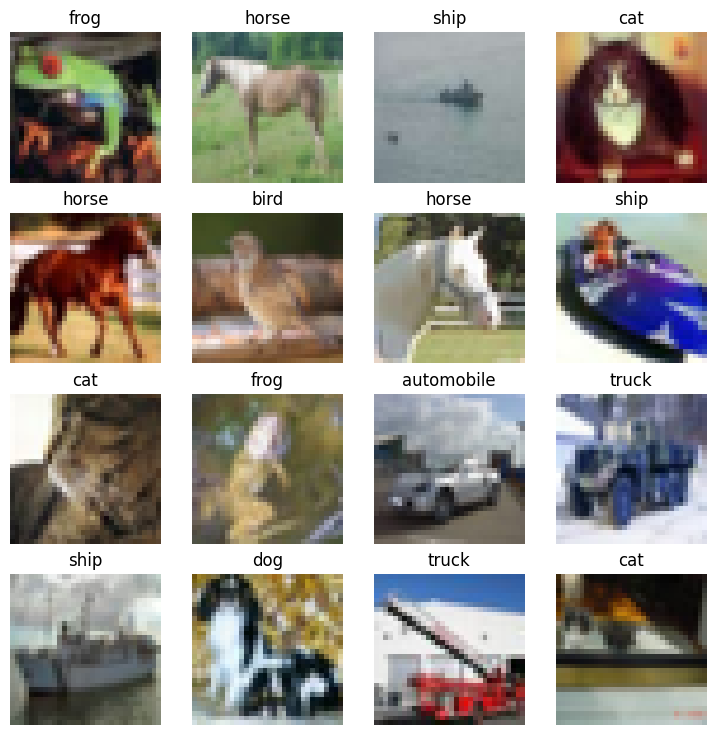

In [ ]:
# Set seed for reproducibility
torch.manual_seed(42)

# Define CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure with subplots
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

# Plot images
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[random_idx]

    # Convert from PyTorch tensor (C, H, W) to NumPy array (H, W, C)
    img = img.numpy().transpose((1, 2, 0))

    # Unnormalize the image
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)  # Ensure the image values are between 0 and 1

    # Add subplot
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    ax.set_title(class_names[label])
    ax.axis('off')  # Hide axes ticks

plt.show()


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(trainset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(testset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a08d3690d30>, <torch.utils.data.dataloader.DataLoader object at 0x7a08d3693a30>)
Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

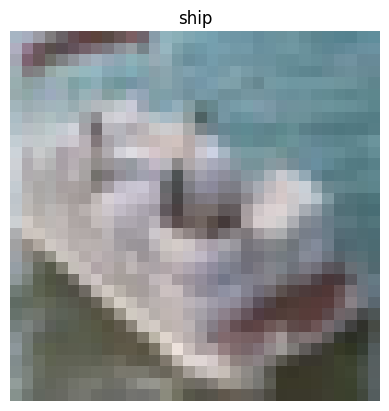

Image size: (32, 32, 3)
Label: 8, label size: torch.Size([])


In [ ]:
# Set the manual seed
torch.manual_seed(42)

# Get a random index
random_idx = torch.randint(len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Convert from PyTorch tensor (C, H, W) to NumPy array (H, W, C)
img = img.numpy().transpose((1, 2, 0))

# Unnormalize the image if necessary
# Assuming normalization mean = 0.5 and std = 0.5 for all channels
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
img = std * img + mean
img = np.clip(img, 0, 1)  # Ensure the image values are between 0 and 1

# Plotting the image
plt.imshow(img)
plt.title(class_names[label])
plt.axis("off")  # It should be "off" not "Off"
plt.show()

# Print image and label details
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.size()}")  # label.size() to get the size if it's a tensor


In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
print(x)
print(output)

Shape before flattening: torch.Size([3, 32, 32]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 1024]) -> [color_channels, height*width]
tensor([[[ 0.3255,  0.3490,  0.3490,  ...,  0.3098,  0.2706,  0.2314],
         [ 0.3412,  0.3412,  0.3412,  ...,  0.3176,  0.3020,  0.2706],
         [ 0.3020,  0.2706,  0.2314,  ...,  0.2941,  0.2941,  0.2627],
         ...,
         [-0.1922, -0.1686, -0.2941,  ..., -0.3725, -0.3412, -0.3176],
         [-0.2314, -0.1686, -0.2706,  ..., -0.3569, -0.3647, -0.3490],
         [-0.2706, -0.2157, -0.2627,  ..., -0.3725, -0.3882, -0.3882]],

        [[ 0.2863,  0.3098,  0.3098,  ...,  0.2784,  0.2314,  0.1922],
         [ 0.3020,  0.3020,  0.3020,  ...,  0.2784,  0.2627,  0.2314],
         [ 0.2627,  0.2314,  0.1922,  ...,  0.2549,  0.2549,  0.2235],
         ...,
         [-0.1137, -0.0824, -0.1608,  ..., -0.2549, -0.2314, -0.2078],
         [-0.1608, -0.0902, -0.1451,  ..., -0.2471, -0.2549, -0.2392],
         [-0.2000, -0.137

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*8*8,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(trainset.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [ ]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [ ]:
torch.manual_seed(42)
from tqdm import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10

 33%|███▎      | 1/3 [01:23<02:46, 83.09s/it]

Streaming output truncated to the last 5000 lines.
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10

 67%|██████▋   | 2/3 [02:43<01:21, 81.31s/it]

Streaming output truncated to the last 5000 lines.
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10

100%|██████████| 3/3 [04:02<00:00, 80.84s/it]

sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([32, 10, 16, 16])
torch.Size([32, 10, 8, 8])
torch.Size([32, 10])
sefa
torch.Size([16, 10, 16, 16])
torch.Size([16, 10, 8, 8])
torch.Size([16, 10])
Test loss: 1.24495 | Test accuracy: 55.97%


Train time on cpu: 242.537 seconds


In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")